###Bronze Layer

###Load

In [0]:
df=spark.table("Dropouts")

###Silver Layer

In [0]:
# Handle missing values (drop rows with nulls in key columns)
df_clean = df.dropna(subset=["State", "Gender", "Reason_for_Dropout", "Age"])

In [0]:
from pyspark.sql.functions import col

df_clean = df_clean.withColumn(
    "Dropout_Year",
    col("Dropout_Year").cast("int")
)
df_clean = df_clean.withColumn(
    "Enrollment_Year",
    col("Enrollment_Year").cast("int")
)

###Transformation

In [0]:
from pyspark.sql.functions import col

df_transformed = df_clean  # Assign your cleaned DataFrame to df_transformed

df_transformed = df_transformed.filter(
    (col("Age") >= 5) & (col("Age") <= 18)
)
display(df_transformed)

Student_ID State District School_Type Grade_Level Gender Social_Category Dropout_Year Age Reason_for_Dropout Enrollment_Year 1 West Bengal Kolkata Government Secondary (9-10) Male SC 2014 16 Lack of Infrastructure 2012 2 Jharkhand Ranchi Government Primary (1-5) Male OBC 2014 7 Early Marriage 2009 3 Uttar Pradesh Allahabad Government Upper Primary (6-8) Female General 2015 12 Academic Failure 2012 4 Uttar Pradesh Varanasi Government Primary (1-5) Male OBC 2016 8 Health Issues 2011 5 Odisha Berhampur Government Primary (1-5) Male OBC 2021 8 Family Responsibilities 2019 6 Bihar Gaya Government Secondary (9-10) Female General 2021 15 Academic Failure 2017 7 Uttar Pradesh Varanasi Government Upper Primary (6-8) Male General 2018 13 Early Marriage 2015 8 Uttar Pradesh Agra Government Upper Primary (6-8) Female OBC 2015 12 Migration 2013 9 Uttar Pradesh Kanpur Government Secondary (9-10) Male SC 2022 16 Migration 2018 10 Uttar Pradesh Agra Government Upper Primary (6-8) Female OBC 2015 11 Health Issues 2011 11 Telangana Karimnagar Government Secondary (9-10) Male ST 2024 16 Family Responsibilities 2022 12 Gujarat Surat Government Secondary (9-10) Female OBC 2014 15 Family Responsibilities 2009 13 Odisha Sambalpur Government Secondary (9-10) Male OBC 2019 16 Health Issues 2015 14 Bihar Muzaffarpur Government Primary (1-5) Male OBC 2019 10 Health Issues 2017 15 Gujarat Vadodara Government Secondary (9-10) Male SC 2016 14 Family Responsibilities 2014 16 Jharkhand Bokaro Government Primary (1-5) Female General 2021 8 Economic Hardship 2018 17 Gujarat Ahmedabad Government Primary (1-5) Male SC 2020 7 Economic Hardship 2015 18 Chhattisgarh Bhilai Government Upper Primary (6-8) Female OBC 2015 13 Health Issues 2012 19 Maharashtra Nashik Government Secondary (9-10) Female OBC 2017 14 Economic Hardship 2015 20 Rajasthan Ajmer Government Secondary (9-10) Female SC 2019 14 Economic Hardship 2017 21 Gujarat Ahmedabad Government Secondary (9-10) Male OBC 2017 16 Lack of Infrastructure 2012 22 Uttar Pradesh Agra Government Secondary (9-10) Male SC 2016 15 Academic Failure 2014 23 West Bengal Kolkata Government Primary (1-5) Female General 2014 7 Economic Hardship 2009 24 Bihar Gaya Government Upper Primary (6-8) Male General 2017 13 Economic Hardship 2015 25 Other Various Government Primary (1-5) Male ST 2016 6 Economic Hardship 2014 26 Other Various Government Secondary (9-10) Female ST 2019 16 Distance to School 2014 27 Bihar Bhagalpur Government Upper Primary (6-8) Male OBC 2014 12 Economic Hardship 2009 28 Odisha Sambalpur Government Primary (1-5) Female SC 2015 10 Economic Hardship 2012 29 Rajasthan Ajmer Government Upper Primary (6-8) Female OBC 2016 13 Family Responsibilities 2012 30 Assam Dibrugarh Government Secondary (9-10) Male ST 2014 16 Academic Failure 2010 31 Assam Guwahati Government Primary (1-5) Female OBC 2014 10 Economic Hardship 2010 32 Bihar Bhagalpur Government Secondary (9-10) Female OBC 2014 16 Early Marriage 2012 33 West Bengal Siliguri Government Upper Primary (6-8) Female General 2014 11 Lack of Infrastructure 2011 34 Uttar Pradesh Allahabad Government Upper Primary (6-8) Male OBC 2021 13 Family Responsibilities 2019 35 Bihar Muzaffarpur Government Secondary (9-10) Male ST 2014 15 Economic Hardship 2009 36 Odisha Berhampur Government Secondary (9-10) Male General 2019 14 Family Responsibilities 2015 37 Jharkhand Dhanbad Government Upper Primary (6-8) Male OBC 2022 11 Lack of Infrastructure 2019 38 Maharashtra Mumbai Government Upper Primary (6-8) Female General 2023 13 Economic Hardship 2020 39 Gujarat Surat Government Secondary (9-10) Male OBC 2016 15 Health Issues 2013 40 Uttar Pradesh Kanpur Government Upper Primary (6-8) Male OBC 2015 12 Academic Failure 2012 41 Uttar Pradesh Lucknow Government Upper Primary (6-8) Male SC 2020 12 Early Marriage 2015 42 Maharashtra Aurangabad Government Upper Primary (6-8) Male General 2015 13 Safety Concerns 2011 43 Bihar Purnia Government Upper Primary (6-8) Female ST 2018 13 Econ

In [0]:
# Register as temp table for SQL queries
df_transformed.createOrReplaceTempView("dropouts_table")

###Gold Layer

In [0]:
# Histogram for Age (use display for plot in Databricks)
display(df_transformed.select("Age"))

Age 16 7 12 8 8 15 13 12 16 11 16 15 16 10 14 8 7 13 14 14 16 15 7 13 6 16 12 10 13 16 10 16 11 13 15 14 11 13 15 12 12 13 13 7 16 16 12 11 14 6 7 15 11 11 6 6 13 12 14 9 11 13 14 15 6 15 16 15 11 12 12 13 13 10 12 15 12 15 12 14 13 14 16 15 16 15 15 13 6 14 14 11 14 15 14 16 9 9 12 16 14 11 14 15 15 15 12 15 15 16 15 16 8 10 14 16 15 16 7 13 11 14 9 16 15 8 13 12 15 9 14 11 8 10 11 10 9 14 14 12 8 11 16 11 16 8 13 11 15 10 13 11 14 16 15 10 10 12 12 14 16 11 8 16 16 13 14 15 8 16 16 10 12 15 11 16 14 14 12 14 16 13 15 12 9 10 11 12 16 10 16 12 15 11 13 14 16 12 13 11 7 13 12 16 16 13 12 16 12 16 15 15 14 16 13 14 15 10 13 16 11 16 13 12 14 16 10 8 14 14 13 7 14 6 11 10 16 15 7 14 15 14 12 15 12 16 13 15 14 7 15 7 9 16 11 14 14 14 16 13 15 12 12 16 11 9 13 15 8 15 11 12 12 15 16 16 11 9 13 15 16 11 13 8 10 7 11 15 12 16 14 14 14 15 14 12 16 15 13 7 11 12 14 14 7 7 15 13 13 11 11 10 14 16 10 16 15 16 14 11 12 15 13 14 11 6 8 9 15 9 14 7 12 14 14 15 14 16 13 12 12 13 13 14 13 15 15 13 16 9 15 8 12 16 14 16 14 14 10 15 11 16 16 13 7 12 11 6 16 8 15 8 15 11 8 15 14 16 16 16 16 12 16 15 15 10 15 13 14 11 12 13 8 14 12 12 13 14 11 14 14 14 16 14 11 15 13 15 16 8 16 6 14 15 11 16 16 8 15 12 11 14 9 16 14 16 13 16 15 10 15 11 15 15 14 14 12 14 15 16 14 14 14 9 16 9 12 14 12 16 12 9 14 12 14 16 11 15 16 15 14 16 15 14 9 11 7 14 11 14 16 16 15 13 16 13 15 16 10 14 10 16 14 16 12 14 16 16 12 16 13 11 6 15 6 11 11 12 16 13 11 12 12 14 14 15 16 6 7 15 16 12 8 15 13 13 15 16 15 14 6 11 16 11 14 13 16 15 12 15 13 14 7 9 15 13 14 16 11 16 16 11 8 11 15 8 14 7 11 7 6 8 14 7 6 16 10 8 12 16 10 15 7 14 14 14 16 8 16 7 11 14 16 14 12 11 11 15 14 9 15 11 11 14 14 15 7 16 16 14 16 16 11 16 16 15 15 12 14 14 11 8 12 15 7 9 15 9 12 8 15 15 16 12 14 16 12 14 14 11 14 15 14 14 16 16 14 11 13 10 15 11 14 15 12 10 16 12 11 16 12 12 12 16 8 9 13 13 15 16 12 6 7 6 16 12 14 10 10 15 15 10 12 10 14 14 15 12 11 13 12 11 10 7 10 15 12 16 13 13 11 16 7 6 11 16 9 7 14 12 15 8 14 8 14 16 12 16 9 15 12 13 11 15 13 12 14 12 11 16 8 16 15 16 6 8 16 7 9 8 9 8 12 9 16 15 14 14 13 11 11 15 14 8 11 16 16 13 16 16 15 11 16 16 14 9 12 14 16 16 16 10 11 14 11 8 15 11 13 16 16 11 16 12 9 9 11 13 15 10 16 13 8 14 14 12 12 14 6 11 11 6 7 8 15 14 15 16 10 14 12 16 16 12 15 6 14 9 12 15 7 8 14 12 6 14 16 15 14 15 12 16 15 14 15 15 7 14 15 11 15 16 13 15 16 11 15 8 13 16 15 14 14 14 11 11 11 12 15 14 16 15 15 16 14 16 13 14 15 15 15 12 14 16 8 11 6 14 15 14 15 14 16 16 7 11 13 13 14 16 12 12 16 15 15 12 16 16 14 15 15 16 12 10 11 13 8 15 16 13 11 16 15 16 15 10 11 13 13 12 15 11 14 16 14 11 12 16 14 14 8 6 15 12 13 13 16 16 13 6 9 16 15 14 11 12 15 16 13 9 14 16 15 13 14 16 8 16 7 8 6 11 15 11 16 15 8 15 16 11 11 15 14 16 13 14 13 14 10 12 14 15 11 12 16 15 15 13 11 16 13 16 14 8 16 15 11 15 13 16 11 12 11 8 10 11 14 11 14 15 14 16 14 13 11 15 13 8 14 8 15 14 15 13 14 14 14 14 11 11 7 15 7 14 13 16 11 15 11 11 8 16 11 16 14 14 7 11 16 11 8 15 15 7 12 16 15 14 14 13 13 14 12 14 15 11 8 11 16 13 16 14 14 6 8 14 6 16 12 14 14 9 14 15 14 9 15 16 8 14 9 8 12 16 16 16 16 9 11 16 14 9 12 11 15 10 16 12 15 16 14 12 15 11 9 11 15 6 7 11 14 13 16 11 11 16 15 10 12 14 12 13 7 14 8 9 16 16 15 16 16 11 10 10 7 14 13 11 13 9 13 14 16 12 11 12 15 15 12 13 6 10 8 14 16 12 8 11 15 11 14 7 14 11 16 10 16 10 14 13 13 14 6 14 16 16 13 14 13 14 7 14 14 14 13 16 9 9 13 14 11 14 15 15 14 13 6 13 13 15 16 16 12 15 7 9 15 6 15 16 15 12 15 16 16 14 15 15 15 11 11 15 12 9 16 16 12 16 12 14 14 11 13 16 16 11 16 13 15 14 12 15 12 11 11 8 12 14 8 15 6 15 13 15 16 7 15 8 16 16 9 8 8 14 7 10 12 16 10 13 12 16 16 12 16 14 16 13 15 14 12 16 10 13 6 13 13 15 14 12 13 12 7 10 12 10 14 15 11 15 14 12 8 14 11 16 6 12 15 16 13 15 14 16 11 13 16 13 15 11 13 9 14 11 13 7 16 13 12 14 10 15 14 10 14 15 6 16 6 8 15 8 14 16 14 11 7 16 14 11 7 16 11 14 15 12 14 12 15 7 15 12 12 14 7 10 16 11 16 14 14 13 11 16 16 15 16 14 14 6 13 12 12 14 16 6 16 14 16 14 15 14 14 13 16 7 16 15 14 8 13 13 7 15 13 14 10 12 13 15 14 9 16 16 13

Databricks visualization. Run in Databricks to view.

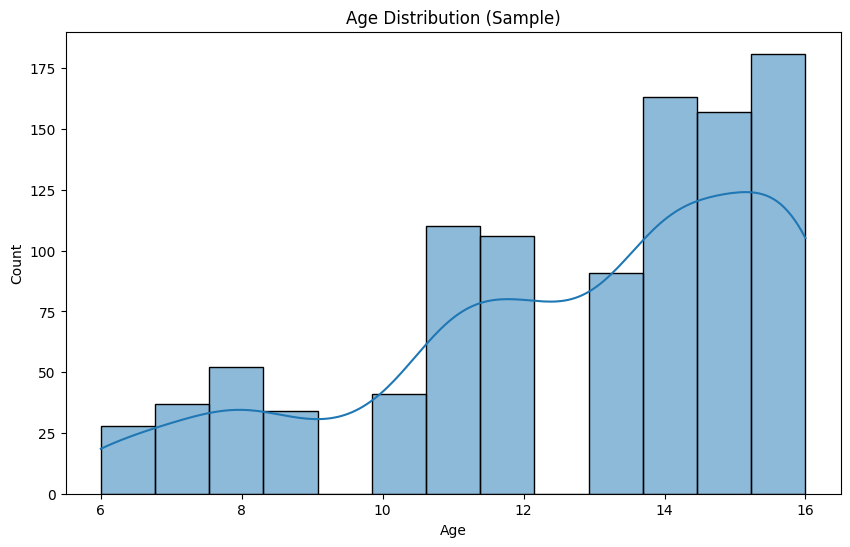

In [0]:
# Pandas-style EDA (convert small sample to Pandas for quick plots, but avoid on full 100k rows)
sample_pd = df_transformed.limit(1000).toPandas()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(sample_pd['Age'], kde=True)
plt.title("Age Distribution (Sample)")
plt.show()

###Platinum Layer

In [0]:
%sql
SELECT Reason_for_Dropout, COUNT(*) AS Count
FROM dropouts_table
WHERE Dropout_Year > 2014
GROUP BY Reason_for_Dropout
ORDER BY Count DESC
LIMIT 5

Reason_for_Dropout Count Economic Hardship 21204 Academic Failure 16782 Family Responsibilities 15103 Early Marriage 8391 Health Issues 6755

In [0]:
%sql
SELECT Dropout_Year, COUNT(*) AS Dropouts,
       RANK() OVER (ORDER BY COUNT(*) DESC) AS Rank
FROM dropouts_table
GROUP BY Dropout_Year

Dropout_Year Dropouts Rank 2014 15909 1 2015 14400 2 2016 13227 3 2017 11807 4 2018 10609 5 2019 9044 6 2020 7949 7 2021 6606 8 2022 5267 9 2023 3861 10 2024 1321 11

In [0]:
%sql
SELECT * FROM (
    SELECT Grade_Level, Gender
    FROM dropouts_table
) PIVOT (
    COUNT(*) FOR Gender IN ('Male', 'Female')
)

Grade_Level Male Female Secondary (9-10) 26514 23896 Primary (1-5) 10359 9332 Upper Primary (6-8) 15751 14148

In [0]:
%sql
SELECT State, COUNT(*) AS Count FROM dropouts_table GROUP BY State ORDER BY Count DESC LIMIT 10

State Count Bihar 15763 Uttar Pradesh 15544 Rajasthan 10292 Madhya Pradesh 8011 Odisha 7086 Jharkhand 6141 West Bengal 5056 Other 4046 Maharashtra 4040 Tamil Nadu 3049

Databricks visualization. Run in Databricks to view.

In [0]:
%sql
SELECT Grade_Level, Gender, COUNT(*) AS Count FROM dropouts_table GROUP BY Grade_Level, Gender

Grade_Level Gender Count Secondary (9-10) Male 26514 Primary (1-5) Male 10359 Upper Primary (6-8) Female 14148 Secondary (9-10) Female 23896 Upper Primary (6-8) Male 15751 Primary (1-5) Female 9332

Databricks visualization. Run in Databricks to view.

In [0]:
%sql
SELECT Dropout_Year, COUNT(*) AS Count FROM dropouts_table GROUP BY Dropout_Year ORDER BY Dropout_Year

Dropout_Year Count 2014 15909 2015 14400 2016 13227 2017 11807 2018 10609 2019 9044 2020 7949 2021 6606 2022 5267 2023 3861 2024 1321

Databricks visualization. Run in Databricks to view.

In [0]:
%sql
SELECT Social_Category, COUNT(*) AS Count FROM dropouts_table GROUP BY Social_Category

Social_Category Count SC 19942 OBC 40111 General 24981 ST 14966

Databricks visualization. Run in Databricks to view.